## Defaulting Credit Card Payment

### Personal Objective:
#### To Brush up on EDA, Feature Engineering and modelling


#### Classification Models - Binary Classification


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm
import itertools

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import multilabel_confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
data = pd.read_csv("UCI_Credit_Card.csv", parse_dates=True)

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
#exploring the dataset
def explore(df):
    pd.set_option('display.max_columns', None)
    print("Shape:", df.shape)
    print("")
    print("First 5 lines")
    print(df.head())
    print("")
    print("Type of data")
    print(df.dtypes)
    print("")
    print("Null values")
    print(df.isnull().sum())
    print("")
    print("Summary")
    print(df.describe())
    
explore(data)

Shape: (30000, 25)

First 5 lines
   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2     3913.0     3102.0      689.0        0.0        0.0   
1      0      2     2682.0     1725.0     2682.0     3272.0     3455.0   
2      0      0    29239.0    14027.0    13559.0    14331.0    14948.0   
3      0      0    46990.0    48233.0    49291.0    28314.0    28959.0   
4      0      0     8617.0     5670.0    35835.0    20940.0    19146.0   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PA

## Notes:
#### (i) No null values - that makes our lives easier

#### (ii) drop ID column since we already have index()

#### (iii) Change Sex/Gender into a binary classification instead

#### (iv) Eduation has 5 and 6 as unknown, probably better if we combine them since we have no other information at this moment.
#### (iv) Missing data with Education = 0

#### (v) Marriage - Might do hot encoding since there are only 3 class
#### (v) Missing data with Marriage = 0

#### (vi) Change Pay_0 into something else since it is confusing
#### (vi) Pay_Amt is for the previous month

#### (vii) Find connection between Bill Amt x Pay Amt x Pay
#### (vii) What does -2 or 0 in Pay_# means

In [6]:
data = data.drop(['ID'], axis=1)

In [7]:
#Change Sex into a binary classification
# 1 = male , 0 = female
def change_sex(data):
    for i in range(data.shape[0]):
        if data[i] == 2:
            data[i] = 0

change_sex(data['SEX'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
data.loc[(data["EDUCATION"] == 0 )]
#Since there are only 14 entries, we can park it in unknown

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
3769,290000.0,0,0,2,38,1,-1,-1,-1,-1,-1,0.0,1437.0,3070.0,1406.0,2196.0,1481.0,1437.0,3078.0,1406.0,2196.0,1481.0,0.0,0
5945,270000.0,1,0,2,39,1,-1,-1,-1,-1,-2,0.0,10193.0,69553.0,18607.0,0.0,0.0,10193.0,70213.0,19008.0,399.0,0.0,0.0,0
6876,360000.0,1,0,2,30,0,0,-1,0,0,-1,40250.0,23022.0,12272.0,34345.0,36777.0,30.0,23000.0,12280.0,25007.0,25008.0,1767.0,3300.0,0
14631,350000.0,0,0,2,53,-1,-1,-1,-1,-1,-1,5095.0,4815.0,61044.0,22611.0,1385.0,6043.0,4840.0,61349.0,22687.0,1389.0,6058.0,1153.0,0
15107,210000.0,1,0,2,45,-2,-2,-2,-2,-2,-2,2563.0,5854.0,1032.0,788.0,3499.0,3372.0,5854.0,1032.0,788.0,3565.0,3372.0,15381.0,0
16881,100000.0,1,0,2,37,0,0,-2,-2,-2,-2,7642.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16896,200000.0,1,0,2,40,1,-2,-1,-1,-1,-2,0.0,0.0,200.0,1000.0,0.0,0.0,0.0,200.0,1000.0,0.0,0.0,0.0,0
17414,230000.0,0,0,2,47,-1,-1,-1,2,-1,-1,8394.0,5743.0,1336.0,255.0,5425.0,4838.0,5743.0,1598.0,0.0,5425.0,4838.0,3840.0,0
19920,50000.0,0,0,1,40,0,0,0,0,0,0,44749.0,46229.0,46798.0,47647.0,40500.0,41921.0,2229.0,2298.0,2100.0,2500.0,1921.0,8432.0,0
20030,200000.0,0,0,2,30,-1,-1,2,-1,-1,-1,17160.0,7289.0,2868.0,9470.0,5816.0,7809.0,2880.0,0.0,9470.0,5834.0,7809.0,2886.0,0


In [9]:
#Combine 5 and 6 together in education to be 0 instead
def change_edu(data):
    for i in range(data.shape[0]):
        if data[i] == 5 or data[i] == 6 or data[i] == 0:
            data[i] = 0

change_edu(data['EDUCATION'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [10]:
data.loc[(data["MARRIAGE"] == 0)].shape
#Since there are only 54 entries, we can park it in unknown

#Combine 0 and 3 together in Marriage = others together be 0 instead
def change_marriage(data):
    for i in range(data.shape[0]):
        if data[i] == 3:
            data[i] = 0

change_marriage(data['MARRIAGE'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#Change marriage into one hot encoding
data = pd.get_dummies(data, columns=["MARRIAGE"], prefix=["Type_"])
data.head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,Type__0,Type__1,Type__2
0,20000.0,0,2,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0
1,120000.0,0,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,0,1
2,90000.0,0,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,1
3,50000.0,0,2,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0
4,50000.0,1,2,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,0


#### Change the naming of the following - for my own better understanding:
#### Marriage_0 to Marriage_others
#### Marriage_1 to Marriage_married
#### Marriage_2 to Marriage_single

#### PAY_0 to Pay_Status9 - to denote Sept
#### Same applies for the rest of PAY_month

#### Bill_Amt1 to Bill_Amt9 - to denote Sept
#### Same applies for the rest of BILL_AMT_month

#### Pay_Amt1 to Pay_Amt8 - *this is to denote that the payment is made in Sept BUT for the transactions done in Aug!
#### Aligning the Pay_Amt to the bill will make easier comparision + feature engineeering down the line (I hope)
#### Same applies for the rest of Pay_Amt_month

#### Using this logic - we will have the information on how much someone pays for their bill in March without the actual bill
#### so this piece of information may or may not be usful in our case (might delete that later - KIV)

#### On that same note - I'm not sure if I should be doing T-1 on Pay_status as well, for now I will keep it this way

#### Change target column to "Default9" - ie will he/she pay up for the Sept bill

In [12]:
data.columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'AGE', 'PAY_STATUS9', 'PAY_STATUS8', 'PAY_STATUS7',
       'PAY_STATUS6', 'PAY_STATUS5', 'PAY_STATUS4', 'BILL_AMT9', 'BILL_AMT8', 'BILL_AMT7',
       'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'PAY_AMT8', 'PAY_AMT7',
       'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3',
       'DEFAULT9', 'MARRIAGE_OTHERS', 'MARRIAGE_MARRIED', 'MARRIAGE_SINGLE']

#Change rearranging the marriage columns to the front
data = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'AGE', 'MARRIAGE_OTHERS', 'MARRIAGE_MARRIED', 'MARRIAGE_SINGLE',
         'PAY_STATUS9', 'PAY_STATUS8', 'PAY_STATUS7','PAY_STATUS6', 'PAY_STATUS5', 'PAY_STATUS4', 
         'BILL_AMT9', 'BILL_AMT8', 'BILL_AMT7', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 
         'PAY_AMT8', 'PAY_AMT7','PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3',
         'DEFAULT9']]

In [13]:
data['PAY_STATUS9'].unique()
#Upon exploration on Pay_status, there are some values -2 and 0 which we don't understand what they mean.
#If -1 = pay duly, then what is 0 and what is -2 ?? Any positive integer here means late payment, so no issues with those.
#Coming back to our objective, if our goal is to predict if they will default payment or not, we can simply group them into
#two buckets - paid on time [0, -1, -2] and late payment [any positive integer]

array([ 2, -1,  0, -2,  1,  3,  4,  8,  7,  5,  6])

In [14]:
#changing all late payments to 1 and all on-time payments to 0 for all pay_status columns
status_columns = data.columns[7:13]
def change_status(data,columns):
    for i, j in itertools.product(range(data.shape[0]), range(len(columns))):
        if data[columns[j]][i] > 0:
            data[columns[j]][i] = 1 #late
        else:
            data[columns[j]][i] = 0

change_status(data,status_columns)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,AGE,MARRIAGE_OTHERS,MARRIAGE_MARRIED,MARRIAGE_SINGLE,PAY_STATUS9,PAY_STATUS8,PAY_STATUS7,PAY_STATUS6,PAY_STATUS5,PAY_STATUS4,BILL_AMT9,BILL_AMT8,BILL_AMT7,BILL_AMT6,BILL_AMT5,BILL_AMT4,PAY_AMT8,PAY_AMT7,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,DEFAULT9
0,20000.0,0,2,24,0,1,0,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,2,26,0,0,1,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,2,34,0,0,1,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,2,37,0,1,0,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,57,0,1,0,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


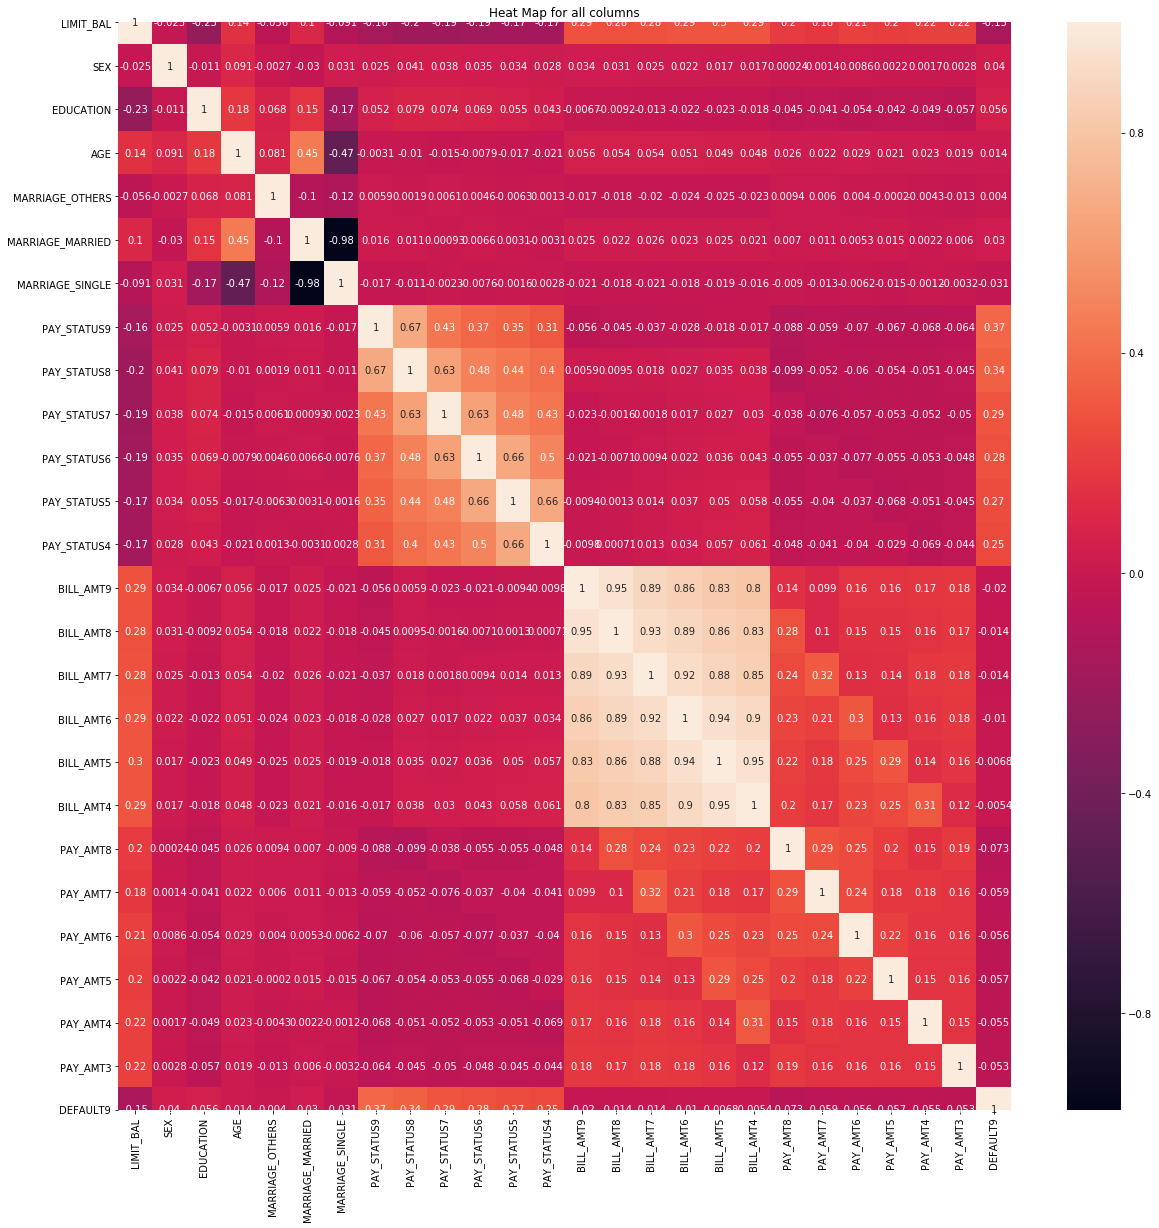

In [16]:
fig, ax = plt.subplots(figsize=(20,20)) 
ax.set_title('Heat Map for all columns')
sns.heatmap(data.corr(), ax = ax, annot=True, annot_kws={"size": 10})
#All the pay_status seem to be positively correlated to each other
#and all the bill amounts as well - not sure how that links up at the moment

% DID NOT DEFAULT 9 in the dataset:  77.88
% DEFAULTED 9 in the dataset:  22.12


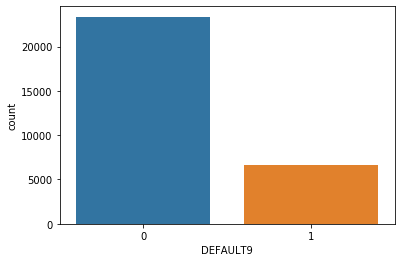

In [17]:
sns.countplot(x="DEFAULT9", data=data)
print("% DID NOT DEFAULT 9 in the dataset: " , round(data['DEFAULT9'].value_counts()[0]/data.shape[0]*100,2))
print("% DEFAULTED 9 in the dataset: " , round(data['DEFAULT9'].value_counts()[1]/data.shape[0]*100,2))
#Only 22% of the dataset defaulted

% Female in the dataset:  60.37
% Male in the dataset:  39.63

SEX
0    3763
1    2873
Name: DEFAULT9, dtype: int64

% Female defaulted 20.78
% Male defaulted 24.17


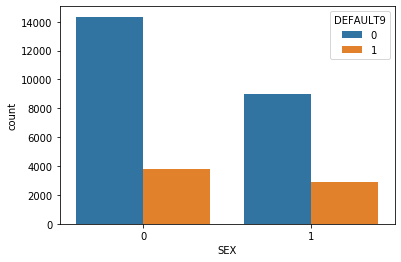

In [18]:
sns.countplot(x="SEX", hue="DEFAULT9", data=data)
print("% Female in the dataset: " , round(data['SEX'].value_counts()[0]/data.shape[0]*100,2))
print("% Male in the dataset: " , round(data['SEX'].value_counts()[1]/data.shape[0]*100,2))
print()
print(data.groupby(['SEX'])['DEFAULT9'].sum())
print()
print("% Female defaulted" , round(data.groupby(['SEX'])['DEFAULT9'].sum()[0]/data['SEX'].value_counts()[0]*100,2))
print("% Male defaulted" , round(data.groupby(['SEX'])['DEFAULT9'].sum()[1]/data['SEX'].value_counts()[1]*100,2))
#Only 22% of the dataset defaulted
#No major different in default rate between male and female

% Unknown in the dataset:  1.15
% Grad Sch in the dataset:  35.28
% Uni in the dataset:  46.77
% High Sch in the dataset:  16.39
% Others in the dataset:  0.41

EDUCATION
0      26
1    2036
2    3330
3    1237
4       7
Name: DEFAULT9, dtype: int64

% Unknown defaulted 7.54
% Grad Sch defaulted 19.23
% Uni defaulted 31.46
% High Sch defaulted 11.69
% Others Sch defaulted 0.07


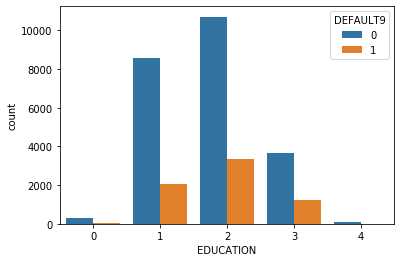

In [19]:
sns.countplot(x="EDUCATION", hue="DEFAULT9", data=data)
print("% Unknown in the dataset: " , round(data['EDUCATION'].value_counts()[0]/data.shape[0]*100,2))
print("% Grad Sch in the dataset: " , round(data['EDUCATION'].value_counts()[1]/data.shape[0]*100,2))
print("% Uni in the dataset: " , round(data['EDUCATION'].value_counts()[2]/data.shape[0]*100,2))
print("% High Sch in the dataset: " , round(data['EDUCATION'].value_counts()[3]/data.shape[0]*100,2))
print("% Others in the dataset: " , round(data['EDUCATION'].value_counts()[4]/data.shape[0]*100,2))
print()
print(data.groupby(['EDUCATION'])['DEFAULT9'].sum())
print()
print("% Unknown defaulted" , round(data.groupby(['EDUCATION'])['DEFAULT9'].sum()[0]/data['EDUCATION'].value_counts()[0]*100,2))
print("% Grad Sch defaulted" , round(data.groupby(['EDUCATION'])['DEFAULT9'].sum()[1]/data['EDUCATION'].value_counts()[1]*100,2))
print("% Uni defaulted" , round(data.groupby(['EDUCATION'])['DEFAULT9'].sum()[2]/data['EDUCATION'].value_counts()[1]*100,2))
print("% High Sch defaulted" , round(data.groupby(['EDUCATION'])['DEFAULT9'].sum()[3]/data['EDUCATION'].value_counts()[1]*100,2))
print("% Others Sch defaulted" , round(data.groupby(['EDUCATION'])['DEFAULT9'].sum()[4]/data['EDUCATION'].value_counts()[1]*100,2))
#Only 22% of the dataset defaulted
#Close to half the dataset consist of University Gradudates and 
#within it about 1/3 of them defaulted on payments (which is greater than the dataset 22%)

% Others in the dataset:  1.26
% Married in the dataset:  45.53
% Single in the dataset:  53.21

377
13659
15964

89
3206
3341

% Others defaulted 23.61
% Married defaulted 23.47
% Single defaulted 20.93


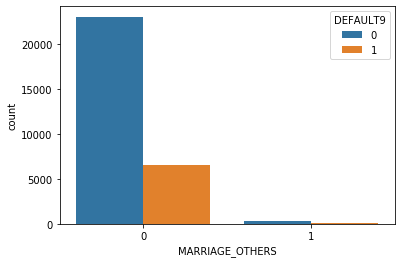

In [20]:
sns.countplot(x="MARRIAGE_OTHERS", hue="DEFAULT9", data=data)
print("% Others in the dataset: " , round(data['MARRIAGE_OTHERS'].value_counts()[1]/data.shape[0]*100,2))
print("% Married in the dataset: " , round(data['MARRIAGE_MARRIED'].value_counts()[1]/data.shape[0]*100,2))
print("% Single in the dataset: " , round(data['MARRIAGE_SINGLE'].value_counts()[1]/data.shape[0]*100,2))
print()
print(round(data['MARRIAGE_OTHERS'].value_counts()[1]))
print(round(data['MARRIAGE_MARRIED'].value_counts()[1]))
print(round(data['MARRIAGE_SINGLE'].value_counts()[1]))
print()
print(data.groupby(['MARRIAGE_OTHERS'])['DEFAULT9'].sum()[1])
print(data.groupby(['MARRIAGE_MARRIED'])['DEFAULT9'].sum()[1])
print(data.groupby(['MARRIAGE_SINGLE'])['DEFAULT9'].sum()[1])
print()
print("% Others defaulted" , round(data.groupby(['MARRIAGE_OTHERS'])['DEFAULT9'].sum()[1]/data['MARRIAGE_OTHERS'].value_counts()[1]*100,2))
print("% Married defaulted" , round(data.groupby(['MARRIAGE_MARRIED'])['DEFAULT9'].sum()[1]/data['MARRIAGE_MARRIED'].value_counts()[1]*100,2))
print("% Single defaulted" , round(data.groupby(['MARRIAGE_SINGLE'])['DEFAULT9'].sum()[1]/data['MARRIAGE_SINGLE'].value_counts()[1]*100,2))
#Only 22% of the dataset defaulted
#No major different in default rates between different marital status 

On-time payment9 in the dataset:  77.27
Late payment9 in the dataset:  22.73

PAY_STATUS9
0    3207
1    3429
Name: DEFAULT9, dtype: int64

On-time payment9 defaulted 13.83
Late payment9 defaulted 50.29


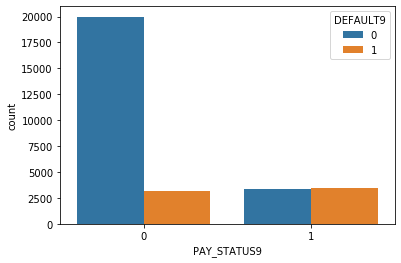

In [21]:
sns.countplot(x="PAY_STATUS9", hue="DEFAULT9", data=data)
print("On-time payment9 in the dataset: " , round(data['PAY_STATUS9'].value_counts()[0]/data.shape[0]*100,2))
print("Late payment9 in the dataset: " , round(data['PAY_STATUS9'].value_counts()[1]/data.shape[0]*100,2))
print()
print(data.groupby(['PAY_STATUS9'])['DEFAULT9'].sum())
print()
print("On-time payment9 defaulted" , round(data.groupby(['PAY_STATUS9'])['DEFAULT9'].sum()[0]/data['PAY_STATUS9'].value_counts()[0]*100,2))
print("Late payment9 defaulted" , round(data.groupby(['PAY_STATUS9'])['DEFAULT9'].sum()[1]/data['PAY_STATUS9'].value_counts()[1]*100,2))
#Only 22% of the dataset defaulted
#A clear indication that pay status is an important factor, of those that late in 
#payment_status, 50% of them defaulted payment [That said there are only 22% with a late payment_status]
#It will be a similar conclusion for the rest of the pay_status months

On-time payment8 in the dataset:  85.21
Late payment8 in the dataset:  14.79

PAY_STATUS8
0    4160
1    2476
Name: DEFAULT9, dtype: int64

On-time payment8 defaulted 16.27
Late payment8 defaulted 55.79


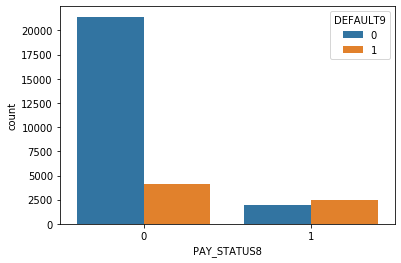

In [22]:
sns.countplot(x="PAY_STATUS8", hue="DEFAULT9", data=data)
print("On-time payment8 in the dataset: " , round(data['PAY_STATUS8'].value_counts()[0]/data.shape[0]*100,2))
print("Late payment8 in the dataset: " , round(data['PAY_STATUS8'].value_counts()[1]/data.shape[0]*100,2))
print()
print(data.groupby(['PAY_STATUS8'])['DEFAULT9'].sum())
print()
print("On-time payment8 defaulted" , round(data.groupby(['PAY_STATUS8'])['DEFAULT9'].sum()[0]/data['PAY_STATUS8'].value_counts()[0]*100,2))
print("Late payment8 defaulted" , round(data.groupby(['PAY_STATUS8'])['DEFAULT9'].sum()[1]/data['PAY_STATUS8'].value_counts()[1]*100,2))

On-time payment7 in the dataset:  85.96
Late payment7 in the dataset:  14.04

PAY_STATUS7
0    4434
1    2202
Name: DEFAULT9, dtype: int64

On-time payment7 defaulted 17.19
Late payment7 defaulted 52.27


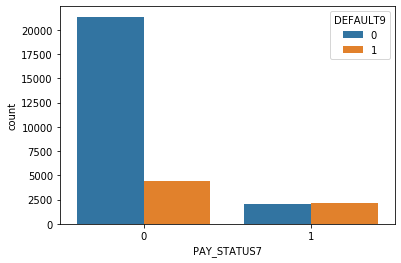

In [23]:
sns.countplot(x="PAY_STATUS7", hue="DEFAULT9", data=data)
print("On-time payment7 in the dataset: " , round(data['PAY_STATUS7'].value_counts()[0]/data.shape[0]*100,2))
print("Late payment7 in the dataset: " , round(data['PAY_STATUS7'].value_counts()[1]/data.shape[0]*100,2))
print()
print(data.groupby(['PAY_STATUS7'])['DEFAULT9'].sum())
print()
print("On-time payment7 defaulted" , round(data.groupby(['PAY_STATUS7'])['DEFAULT9'].sum()[0]/data['PAY_STATUS7'].value_counts()[0]*100,2))
print("Late payment7 defaulted" , round(data.groupby(['PAY_STATUS7'])['DEFAULT9'].sum()[1]/data['PAY_STATUS7'].value_counts()[1]*100,2))

On-time payment6 in the dataset:  88.3
Late payment6 in the dataset:  11.7

PAY_STATUS6
0    4757
1    1879
Name: DEFAULT9, dtype: int64

On-time payment6 defaulted 17.96
Late payment6 defaulted 53.53


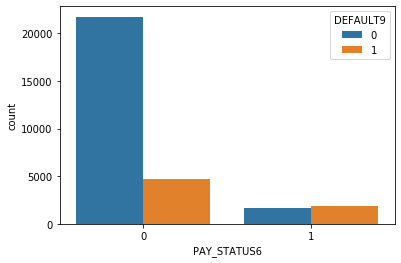

In [24]:
sns.countplot(x="PAY_STATUS6", hue="DEFAULT9", data=data)
print("On-time payment6 in the dataset: " , round(data['PAY_STATUS6'].value_counts()[0]/data.shape[0]*100,2))
print("Late payment6 in the dataset: " , round(data['PAY_STATUS6'].value_counts()[1]/data.shape[0]*100,2))
print()
print(data.groupby(['PAY_STATUS6'])['DEFAULT9'].sum())
print()
print("On-time payment6 defaulted" , round(data.groupby(['PAY_STATUS6'])['DEFAULT9'].sum()[0]/data['PAY_STATUS6'].value_counts()[0]*100,2))
print("Late payment6 defaulted" , round(data.groupby(['PAY_STATUS6'])['DEFAULT9'].sum()[1]/data['PAY_STATUS6'].value_counts()[1]*100,2))

In [25]:
#Hypothesis 1
#Since Bill Amt and Payment Amt doesn't tell us much on whether or not they will default their payment
#we will create a "net_amount" after every month - Payment minus Bill
#if the net_amount is negative, we will assume that they are likely to default their payment next month as well
#net_amount negative = 0, net_amount positive = 1
data['NET_AMOUNT4'] = data['PAY_AMT4'] - data['BILL_AMT4']
data['NET_AMOUNT5'] = data['PAY_AMT5'] - data['BILL_AMT5']
data['NET_AMOUNT6'] = data['PAY_AMT6'] - data['BILL_AMT6']
data['NET_AMOUNT7'] = data['PAY_AMT7'] - data['BILL_AMT7']
data['NET_AMOUNT8'] = data['PAY_AMT8'] - data['BILL_AMT8']

In [26]:
net_columns = data.columns[26:]
def change_net(data,columns):
    for i, j in itertools.product(range(data.shape[0]), range(len(columns))):
        if data[columns[j]][i] >= 0:
            data[columns[j]][i] = 0 
        else:
            data[columns[j]][i] = 1 #late

change_net(data,net_columns)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [27]:
data = data[['LIMIT_BAL', 'SEX', 'EDUCATION', 'AGE', 'MARRIAGE_OTHERS',
       'MARRIAGE_MARRIED', 'MARRIAGE_SINGLE', 'PAY_STATUS9', 'PAY_STATUS8',
       'PAY_STATUS7', 'PAY_STATUS6', 'PAY_STATUS5', 'PAY_STATUS4', 'BILL_AMT9',
       'BILL_AMT8', 'BILL_AMT7', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4',
       'PAY_AMT8', 'PAY_AMT7', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3',
       'NET_AMOUNT8', 'NET_AMOUNT7', 'NET_AMOUNT6', 'NET_AMOUNT5','NET_AMOUNT4',
        'DEFAULT9']]

On-time NET_AMOUNT8 in the dataset:  33.33
Late NET_AMOUNT8 in the dataset:  66.67

NET_AMOUNT8
0.0    1692
1.0    4944
Name: DEFAULT9, dtype: int64

On-time NET_AMOUNT8 defaulted 16.92
Late NET_AMOUNT8 defaulted 24.72


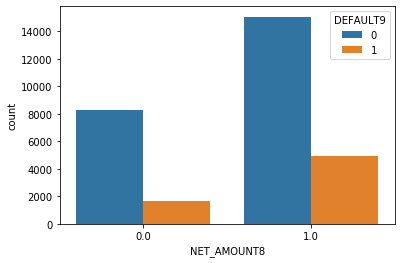

In [28]:
sns.countplot(x="NET_AMOUNT8", hue="DEFAULT9", data=data)
print("On-time NET_AMOUNT8 in the dataset: " , round(data['NET_AMOUNT8'].value_counts()[0]/data.shape[0]*100,2))
print("Late NET_AMOUNT8 in the dataset: " , round(data['NET_AMOUNT8'].value_counts()[1]/data.shape[0]*100,2))
print()
print(data.groupby(['NET_AMOUNT8'])['DEFAULT9'].sum())
print()
print("On-time NET_AMOUNT8 defaulted" , round(data.groupby(['NET_AMOUNT8'])['DEFAULT9'].sum()[0]/data['NET_AMOUNT8'].value_counts()[0]*100,2))
print("Late NET_AMOUNT8 defaulted" , round(data.groupby(['NET_AMOUNT8'])['DEFAULT9'].sum()[1]/data['NET_AMOUNT8'].value_counts()[1]*100,2))
#Only 22% of the dataset defaulted
#People with positive net amount tends to default lesser than those with negative net amounts

On-time NET_AMOUNT7 in the dataset:  34.53
Late NET_AMOUNT7 in the dataset:  65.47

NET_AMOUNT7
0.0    1773
1.0    4863
Name: DEFAULT9, dtype: int64

On-time NET_AMOUNT7 defaulted 17.12
Late NET_AMOUNT7 defaulted 24.76


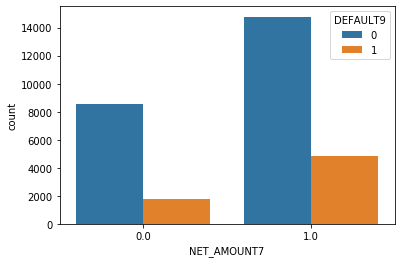

In [29]:
sns.countplot(x="NET_AMOUNT7", hue="DEFAULT9", data=data)
print("On-time NET_AMOUNT7 in the dataset: " , round(data['NET_AMOUNT7'].value_counts()[0]/data.shape[0]*100,2))
print("Late NET_AMOUNT7 in the dataset: " , round(data['NET_AMOUNT7'].value_counts()[1]/data.shape[0]*100,2))
print()
print(data.groupby(['NET_AMOUNT7'])['DEFAULT9'].sum())
print()
print("On-time NET_AMOUNT7 defaulted" , round(data.groupby(['NET_AMOUNT7'])['DEFAULT9'].sum()[0]/data['NET_AMOUNT7'].value_counts()[0]*100,2))
print("Late NET_AMOUNT7 defaulted" , round(data.groupby(['NET_AMOUNT7'])['DEFAULT9'].sum()[1]/data['NET_AMOUNT7'].value_counts()[1]*100,2))

On-time NET_AMOUNT6 in the dataset:  34.38
Late NET_AMOUNT6 in the dataset:  65.62

NET_AMOUNT6
0.0    1797
1.0    4839
Name: DEFAULT9, dtype: int64

On-time NET_AMOUNT6 defaulted 17.42
Late NET_AMOUNT6 defaulted 24.58


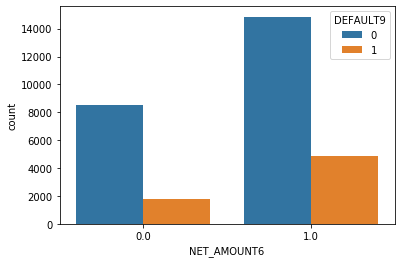

In [30]:
sns.countplot(x="NET_AMOUNT6", hue="DEFAULT9", data=data)
print("On-time NET_AMOUNT6 in the dataset: " , round(data['NET_AMOUNT6'].value_counts()[0]/data.shape[0]*100,2))
print("Late NET_AMOUNT6 in the dataset: " , round(data['NET_AMOUNT6'].value_counts()[1]/data.shape[0]*100,2))
print()
print(data.groupby(['NET_AMOUNT6'])['DEFAULT9'].sum())
print()
print("On-time NET_AMOUNT6 defaulted" , round(data.groupby(['NET_AMOUNT6'])['DEFAULT9'].sum()[0]/data['NET_AMOUNT6'].value_counts()[0]*100,2))
print("Late NET_AMOUNT6 defaulted" , round(data.groupby(['NET_AMOUNT6'])['DEFAULT9'].sum()[1]/data['NET_AMOUNT6'].value_counts()[1]*100,2))

On-time NET_AMOUNT5 in the dataset:  34.71
Late NET_AMOUNT5 in the dataset:  65.29

NET_AMOUNT5
0.0    1882
1.0    4754
Name: DEFAULT9, dtype: int64

On-time NET_AMOUNT5 defaulted 18.07
Late NET_AMOUNT5 defaulted 24.27


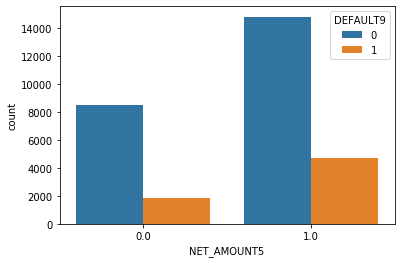

In [31]:
sns.countplot(x="NET_AMOUNT5", hue="DEFAULT9", data=data)
print("On-time NET_AMOUNT5 in the dataset: " , round(data['NET_AMOUNT5'].value_counts()[0]/data.shape[0]*100,2))
print("Late NET_AMOUNT5 in the dataset: " , round(data['NET_AMOUNT5'].value_counts()[1]/data.shape[0]*100,2))
print()
print(data.groupby(['NET_AMOUNT5'])['DEFAULT9'].sum())
print()
print("On-time NET_AMOUNT5 defaulted" , round(data.groupby(['NET_AMOUNT5'])['DEFAULT9'].sum()[0]/data['NET_AMOUNT5'].value_counts()[0]*100,2))
print("Late NET_AMOUNT5 defaulted" , round(data.groupby(['NET_AMOUNT5'])['DEFAULT9'].sum()[1]/data['NET_AMOUNT5'].value_counts()[1]*100,2))

On-time NET_AMOUNT4 in the dataset:  37.18
Late NET_AMOUNT4 in the dataset:  62.82

NET_AMOUNT4
0.0    2041
1.0    4595
Name: DEFAULT9, dtype: int64

On-time NET_AMOUNT4 defaulted 18.3
Late NET_AMOUNT4 defaulted 24.38


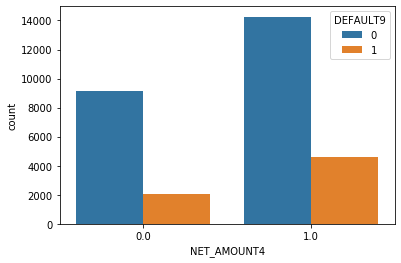

In [32]:
sns.countplot(x="NET_AMOUNT4", hue="DEFAULT9", data=data)
print("On-time NET_AMOUNT4 in the dataset: " , round(data['NET_AMOUNT4'].value_counts()[0]/data.shape[0]*100,2))
print("Late NET_AMOUNT4 in the dataset: " , round(data['NET_AMOUNT4'].value_counts()[1]/data.shape[0]*100,2))
print()
print(data.groupby(['NET_AMOUNT4'])['DEFAULT9'].sum())
print()
print("On-time NET_AMOUNT4 defaulted" , round(data.groupby(['NET_AMOUNT4'])['DEFAULT9'].sum()[0]/data['NET_AMOUNT4'].value_counts()[0]*100,2))
print("Late NET_AMOUNT4 defaulted" , round(data.groupby(['NET_AMOUNT4'])['DEFAULT9'].sum()[1]/data['NET_AMOUNT4'].value_counts()[1]*100,2))

In [33]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,AGE,MARRIAGE_OTHERS,MARRIAGE_MARRIED,MARRIAGE_SINGLE,PAY_STATUS9,PAY_STATUS8,PAY_STATUS7,PAY_STATUS6,PAY_STATUS5,PAY_STATUS4,BILL_AMT9,BILL_AMT8,BILL_AMT7,BILL_AMT6,BILL_AMT5,BILL_AMT4,PAY_AMT8,PAY_AMT7,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,NET_AMOUNT8,NET_AMOUNT7,NET_AMOUNT6,NET_AMOUNT5,NET_AMOUNT4,DEFAULT9
0,20000.0,0,2,24,0,1,0,1,1,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,2,26,0,0,1,0,1,0,0,0,1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0,1.0,1.0,1.0,1.0,1
2,90000.0,0,2,34,0,0,1,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,1.0,1.0,1.0,1.0,1.0,0
3,50000.0,0,2,37,0,1,0,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,1.0,1.0,1.0,1.0,1.0,0
4,50000.0,1,2,57,0,1,0,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,1.0,0.0,1.0,1.0,1.0,0


In [35]:
#setting up our target
y = data['DEFAULT9']
X = data.drop('DEFAULT9',axis=1)

In [36]:
#Preprocessing our X columns with standard scaler
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [37]:
#We will split our data further with using train/test split
X_train, X_test, y_train, y_test = train_test_split(Xs,
                                                    y,
                                                    random_state=42,
                                                    train_size=0.7)

In [38]:
model = []
parameters = []
scores = []
precision = []
recall = []
roc_auc = []
accuracy = []

# To put the name of model, models from sklearn, and hyperparameters of the model we want to search through in order

names = ['Decision Tree', 'RandomForest', 'LogReg','KNN','SVC','AdaBoost', 'BaggingClass']

estimators = [DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(), KNeighborsClassifier(),
             SVC(), AdaBoostClassifier(), BaggingClassifier()]

params = [
    {'clf__max_depth': [None, 10, 15, 20, 30, 35],
    'clf__min_samples_split': [5,10,15,20,25,30]}, #DecisionTree

    {'clf__max_depth': [None,50,75,100,150,200],
     'clf__min_samples_split': [5,10,15,20,30]}, #RandomForest
    
    {'clf__C':[1,3,5,10],
     'clf__solver':['lbfgs', 'liblinear', 'sag', 'saga'],
     'clf__max_iter':[50,100,125,150,175,200]}, #LogisticRegression
    
    {'clf__n_neighbors':[3,5,10,15,20,25],
     'clf__weights':['uniform','distance'],
     'clf__p':[1,2,3]}, #KNeighborsClassifier
    
    {'clf__kernel':['rbf','sigmoid','poly','linear'],
     'clf__degree':[3,4,5,6]}, #SVC
    
    {'clf__n_estimators':[25,40,50,100,200,500]}, #AdaBoost
    
    {'clf__n_estimators':[10,30,50,100],
     'clf__max_samples':[1,5,10],
     'clf__max_features':[1,5,10]}, #BaggingClassifier
]

for name, estimator, param in zip(names, estimators, params):
    clf_pipe = Pipeline([
        ('clf', estimator)
    ])
    cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
    gs = GridSearchCV(clf_pipe, param_grid=param, cv=cv, verbose=10, n_jobs=-1)
    gs.fit(X_train, y_train)
    
    print(name)
    print('Best Score: {}'.format(gs.best_score_))
    print('Best Params: {}'.format(gs.best_params_))
    
    # Best Model
    grid_model = gs.best_estimator_
    
    print('Model Score on X_train: {}'.format(grid_model.score(X_train, y_train)))
    
    # Prediction and score
    pred = grid_model.predict(X_test)
    print('Accuracy score of prediction: {}'.format(accuracy_score(y_test, pred)))
    
    
    # Confusion Matrix 
    
    conf_matrix = multilabel_confusion_matrix(y_test, pred, labels=[0,1,2,3,4])
    
    tn = conf_matrix[:, 0, 0]
    tp = conf_matrix[:, 1, 1]
    fn = conf_matrix[:, 1, 0]
    fp = conf_matrix[:, 0, 1]
    
    print('TN: {}, FP:{}, FN:{}, TP:{}'.format(tn,fp,fn,tp))
    print('Precision of the model is {}'.format(np.round(tp/(tp+fp)),2))
    print('Recall of the model is {}'.format(np.round(tp/(tp+fn)),2))
   
    print('\n')
    model.append(name)
    parameters.append(gs.best_params_)
    scores.append(np.round(accuracy_score(y_test, pred),4))
    accuracy.append(np.round((tp+tn)/(tp+fn+fp+tn),4))
    recall.append(np.round(tp/(tp+fn),4))
    precision.append(np.round(tp/(tp+fp),4))
    roc_auc.append(np.round(roc_auc_score(y_test, pred),4))

results = pd.DataFrame({'model': model, 
                        'parameters': parameters,
                        'scores': scores,
                        'accuracy':accuracy,
                        'recall': recall, 
                        'precision': precision,
                        'roc_auc': roc_auc
                       })
results

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:    6.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    6.8s finished


Decision Tree
Best Score: 0.7978571428571428
Best Params: {'clf__max_depth': 10, 'clf__min_samples_split': 30}
Model Score on X_train: 0.8336666666666667
Accuracy score of prediction: 0.7943333333333333
TN: [ 687 6462 9000 9000 9000], FP:[1273  578    0    0    0], FN:[ 578 1273    0    0    0], TP:[6462  687    0    0    0]
Precision of the model is [ 1.  1. nan nan nan]
Recall of the model is [ 1.  0. nan nan nan]


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  61 tasks      | el

RandomForest
Best Score: 0.8144444444444444
Best Params: {'clf__max_depth': 150, 'clf__min_samples_split': 30}
Model Score on X_train: 0.8645238095238095
Accuracy score of prediction: 0.8097777777777778
TN: [ 686 6602 9000 9000 9000], FP:[1274  438    0    0    0], FN:[ 438 1274    0    0    0], TP:[6602  686    0    0    0]
Precision of the model is [ 1.  1. nan nan nan]
Recall of the model is [ 1.  0. nan nan nan]


Fitting 3 folds for each of 96 candidates, totalling 288 fits


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1652s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Bat

LogReg
Best Score: 0.8103174603174603
Best Params: {'clf__C': 1, 'clf__max_iter': 150, 'clf__solver': 'saga'}
Model Score on X_train: 0.808047619047619
Accuracy score of prediction: 0.8057777777777778
TN: [ 557 6695 9000 9000 9000], FP:[1403  345    0    0    0], FN:[ 345 1403    0    0    0], TP:[6695  557    0    0    0]
Precision of the model is [ 1.  1. nan nan nan]
Recall of the model is [ 1.  0. nan nan nan]


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:  2.9min remaining:   21.6s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  3.6min finished


KNN
Best Score: 0.8105555555555556
Best Params: {'clf__n_neighbors': 20, 'clf__p': 3, 'clf__weights': 'uniform'}
Model Score on X_train: 0.8208095238095238
Accuracy score of prediction: 0.8028888888888889
TN: [ 582 6644 9000 9000 9000], FP:[1378  396    0    0    0], FN:[ 396 1378    0    0    0], TP:[6644  582    0    0    0]
Precision of the model is [ 1.  1. nan nan nan]
Recall of the model is [ 1.  0. nan nan nan]


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  30 out of  48 | elapsed:  2.1min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  35 out of  48 | elapsed:  2.6min remaining:   56.9s
[Parallel(n_jobs=-1)]: Done  40 out of  48 | elapsed:  2.8min remaining

SVC
Best Score: 0.8157936507936508
Best Params: {'clf__degree': 3, 'clf__kernel': 'rbf'}
Model Score on X_train: 0.8223333333333334
Accuracy score of prediction: 0.8122222222222222
TN: [ 676 6634 9000 9000 9000], FP:[1284  406    0    0    0], FN:[ 406 1284    0    0    0], TP:[6634  676    0    0    0]
Precision of the model is [ 1.  1. nan nan nan]
Recall of the model is [ 1.  0. nan nan nan]


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  18 | elapsed:    1.6s remaining:    7.9s
[Parallel(n_jobs=-1)]: Done   5 out of  18 | elapsed:    2.5s remaining:    6.5s
[Parallel(n_jobs=-1)]: Done   7 out of  18 | elapsed:    3.1s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:    3.2s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  11 out of  18 | elapsed:    5.5s remaining:    3.5s
[Parallel(n_jo

AdaBoost
Best Score: 0.8106349206349206
Best Params: {'clf__n_estimators': 200}
Model Score on X_train: 0.8118571428571428
Accuracy score of prediction: 0.8042222222222222
TN: [ 602 6636 9000 9000 9000], FP:[1358  404    0    0    0], FN:[ 404 1358    0    0    0], TP:[6636  602    0    0    0]
Precision of the model is [ 1.  1. nan nan nan]
Recall of the model is [ 1.  0. nan nan nan]


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0895s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  52 out of 108 | elapsed:    2.5s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  96 out of 108 | elapsed:    4.4s remaini

BaggingClass
Best Score: 0.7804761904761904
Best Params: {'clf__max_features': 10, 'clf__max_samples': 10, 'clf__n_estimators': 30}
Model Score on X_train: 0.7775238095238095
Accuracy score of prediction: 0.7827777777777778
TN: [   5 7040 9000 9000 9000], FP:[1955    0    0    0    0], FN:[   0 1955    0    0    0], TP:[7040    5    0    0    0]
Precision of the model is [ 1.  1. nan nan nan]
Recall of the model is [ 1.  0. nan nan nan]




[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    5.1s finished
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


,model,parameters,scores,accuracy,recall,precision,roc_auc
0,Decision Tree,"{'clf__max_depth': 10, 'clf__min_samples_split...",0.7943,"[0.7943, 0.7943, 1.0, 1.0, 1.0]","[0.9179, 0.3505, nan, nan, nan]","[0.8354, 0.5431, nan, nan, nan]",0.6342
1,RandomForest,"{'clf__max_depth': 150, 'clf__min_samples_spli...",0.8098,"[0.8098, 0.8098, 1.0, 1.0, 1.0]","[0.9378, 0.35, nan, nan, nan]","[0.8382, 0.6103, nan, nan, nan]",0.6439
2,LogReg,"{'clf__C': 1, 'clf__max_iter': 150, 'clf__solv...",0.8058,"[0.8058, 0.8058, 1.0, 1.0, 1.0]","[0.951, 0.2842, nan, nan, nan]","[0.8267, 0.6175, nan, nan, nan]",0.6176
3,KNN,"{'clf__n_neighbors': 20, 'clf__p': 3, 'clf__we...",0.8029,"[0.8029, 0.8029, 1.0, 1.0, 1.0]","[0.9438, 0.2969, nan, nan, nan]","[0.8282, 0.5951, nan, nan, nan]",0.6203
4,SVC,"{'clf__degree': 3, 'clf__kernel': 'rbf'}",0.8122,"[0.8122, 0.8122, 1.0, 1.0, 1.0]","[0.9423, 0.3449, nan, nan, nan]","[0.8378, 0.6248, nan, nan, nan]",0.6436
5,AdaBoost,{'clf__n_estimators': 200},0.8042,"[0.8042, 0.8042, 1.0, 1.0, 1.0]","[0.9426, 0.3071, nan, nan, nan]","[0.8301, 0.5984, nan, nan, nan]",0.6249
6,BaggingClass,"{'clf__max_features': 10, 'clf__max_samples': ...",0.7828,"[0.7828, 0.7828, 1.0, 1.0, 1.0]","[1.0, 0.0026, nan, nan, nan]","[0.7827, 1.0, nan, nan, nan]",0.5013


In [42]:
svc_model = SVC(degree=3, kernel='rbf')
svc_model.fit(X_train,y_train)
svc_model.score(X_test,y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8122222222222222

In [43]:
pred = svc_model.predict(X)
conf_matrix_result = confusion_matrix(y, pred)
conf_matrix_result

array([[23364,     0],
       [ 6636,     0]])

In [44]:
tn = conf_matrix_result[0, 0]
tp = conf_matrix_result[1, 1]
fn = conf_matrix_result[1, 0]
fp = conf_matrix_result[0, 1]

accuracy = np.round((tp+tn)/(tp+fn+fp+tn),4)
print(accuracy)

0.7788
